In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, adjusted_rand_score


MIN_SAMPLES = 5

In [2]:
datasets = {
    "Spherical Clusters": pd.read_csv('./Datasets/Speherical_Clusters.csv'),
    "Moon Clusters": pd.read_csv('./Datasets/moons_Clusters.csv'),
    "Nested Clusters": pd.read_csv('./Datasets/Nested_Clusters.csv'),
    # "Hierarchical Structure": pd.read_csv('./Datasets/zoo.csv')
    "Hierarchical Structure": pd.read_csv('./Datasets/Mall_Customers.csv')
}

#### Extracting Truth Labels from each of the dataset

In [3]:
true_labels_spherical = datasets["Spherical Clusters"]['Cluster'].values  
true_labels_moon = datasets["Moon Clusters"]['Cluster'].values  
true_labels_nested = datasets["Nested Clusters"]['Cluster'].values

#### Function to plot the results of the DBSCAN as well as to calculate the Random Index and Silhouette Score

In [4]:
def plotDBSCAN(data, eps, title, true_labels=None):
    # Perform DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=MIN_SAMPLES)
    labels = dbscan.fit_predict(data)

    unique_labels = set(labels)
    num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    num_noise = list(labels).count(-1)

    print("Number of clusters: " + str(num_clusters))
    print("Number of outliers: " + str(num_noise))

    if num_clusters > 1: 
        silhouette_avg = silhouette_score(data, labels)
        print(f'Silhouette Score: {silhouette_avg:.4f}')
    else:
        print("Silhouette Score not available as there are less than 2 clusters...")

    if true_labels is not None:
        ari = adjusted_rand_score(true_labels, labels)
        print(f'Adjusted Rand Index (ARI): {ari:.4f}')
    
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

    plt.scatter(data[labels == -1][:, 0], data[labels == -1][:, 1], c='black', label='Noise', s=30)

    for label in unique_labels:
        if label != -1:
            plt.scatter(data[labels == label][:, 0], data[labels == label][:, 1],
                        c=colors[label % len(colors)], label=f'Cluster {label}', s=30)

    plt.title(title)
    plt.legend(loc='best')
    plt.show()

#### Function to find the best number of eps to use based on the elbow method

In [5]:
def get_eps(data, min_samples):
    nbrs = NearestNeighbors(n_neighbors=min_samples).fit(data)
    distances, _ = nbrs.kneighbors(data)
    k_distances = np.sort(distances[:, -1], axis=0)
    
    kneedle = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
    elbow_index = kneedle.elbow
    
    return k_distances[elbow_index]

#### DBSCAN on Spherical Clusters

Number of clusters: 4
Number of outliers: 10
Silhouette Score: 0.7139
Adjusted Rand Index (ARI): 0.9865


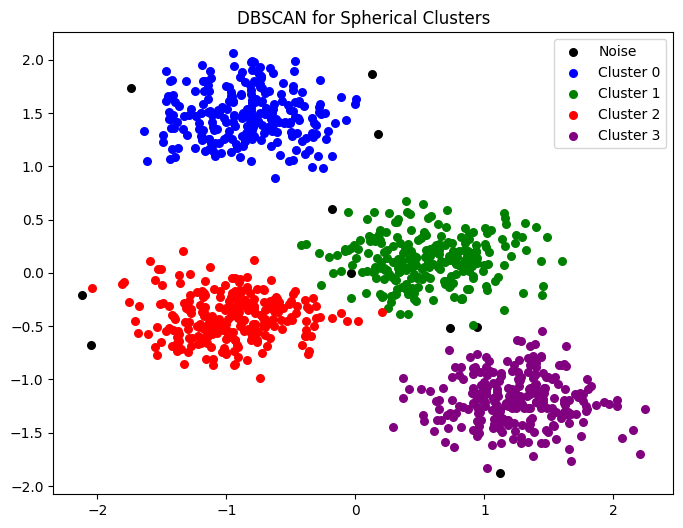

eps value used: 0.25642121625820175


In [6]:
scaler = StandardScaler()
data = datasets["Spherical Clusters"] 
data = scaler.fit_transform(data)
plotDBSCAN(data, get_eps(data, MIN_SAMPLES), "DBSCAN for Spherical Clusters", true_labels=true_labels_spherical)
print("eps value used: " + str(get_eps(data, MIN_SAMPLES)))

#### DBSCAN on Moon Clusters

Number of clusters: 2
Number of outliers: 4
Silhouette Score: 0.4882
Adjusted Rand Index (ARI): 0.9920


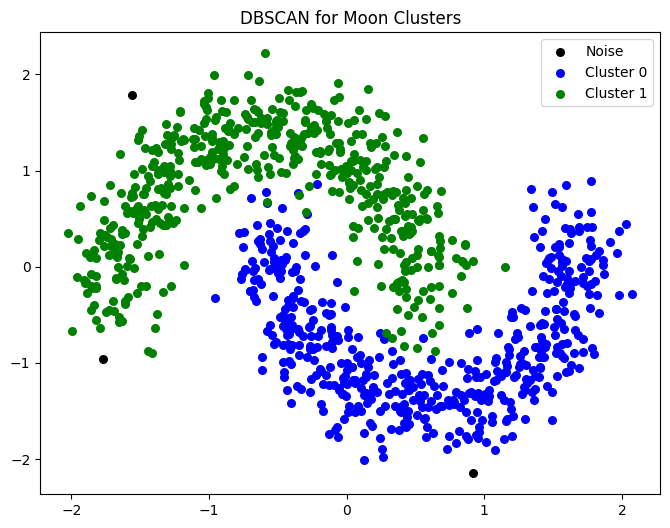

eps value used: 0.2907502372644264


In [7]:
scaler = StandardScaler()
data = datasets["Moon Clusters"] 
data = scaler.fit_transform(data)

plotDBSCAN(data, get_eps(data, MIN_SAMPLES), "DBSCAN for Moon Clusters", true_labels=true_labels_moon)
print("eps value used: " + str(get_eps(data, MIN_SAMPLES)))

#### DBSCAN on Nested Clusters

Number of clusters: 3
Number of outliers: 12
Silhouette Score: 0.2323
Adjusted Rand Index (ARI): 0.9825


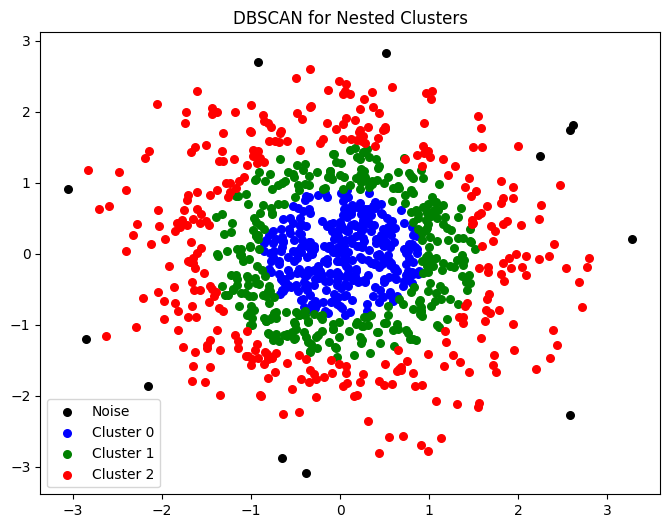

eps value used: 0.47291029493507


In [8]:
scaler = StandardScaler()
data = datasets["Nested Clusters"] 
data = scaler.fit_transform(data)

plotDBSCAN(data, get_eps(data, MIN_SAMPLES), "DBSCAN for Nested Clusters", true_labels=true_labels_nested)
print("eps value used: " + str(get_eps(data, MIN_SAMPLES)))

#### DBSCAN on Hierarchical Structure

Number of clusters: 4


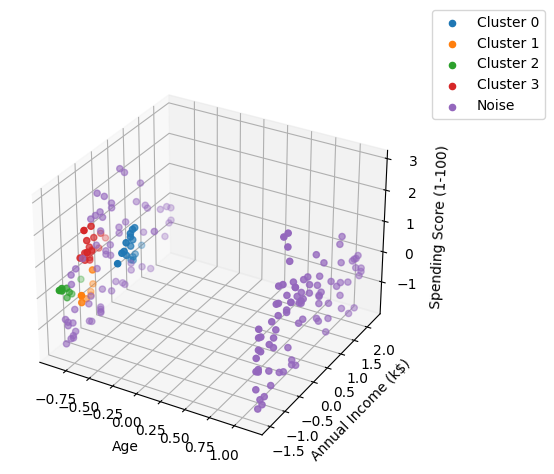

Silhouette Score: -0.2986


In [9]:
data = datasets["Hierarchical Structure"]

feature_columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[feature_columns])

dbscan = DBSCAN(eps=0.5, min_samples=7)
labels = dbscan.fit_predict(data_scaled)

unique_labels = set(labels)

num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f'Number of clusters: {num_clusters}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    cluster_data = data_scaled[labels == label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], 
               label=f'Cluster {label}' if label != -1 else 'Noise')
    
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.legend(loc='center left', bbox_to_anchor=(1.05, 1))  
plt.tight_layout()  
plt.show()

silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")